## Latar Belakang Masalah

Kebahagian merupakan hal yang penting yang harus dimiliki setiap orang. Negara harus menjamin kebahagian rakyatnya dengan mengukur beberapa parameter. Dalam dataset yang saya ambil ada 9 parameter yang dapat mengukur tingkat kebahagian suatu masyarakat di suatu negara.

9 Parameter tersebut adalah Happiness Score, Economy (GDP per Capita), Family, Health, Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

## Tujuan

Tujuannya adalah untuk mengetahui tingkat kebahagian suatu wilayah menggunakan 9 parameter yang telah ada melalui dataset yang diambil dari kaggle

## BAB 1 - Pengumpulan Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
dataset = pd.read_csv('2015.csv')

In [3]:
dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Bab 2 - Menelaah Data 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: 
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


Region : ['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [6]:
print("\nJumlah Missing Values per Kolom:")
print(dataset.isnull().sum())


Jumlah Missing Values per Kolom:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


### Cek Korelasi Tahap 1

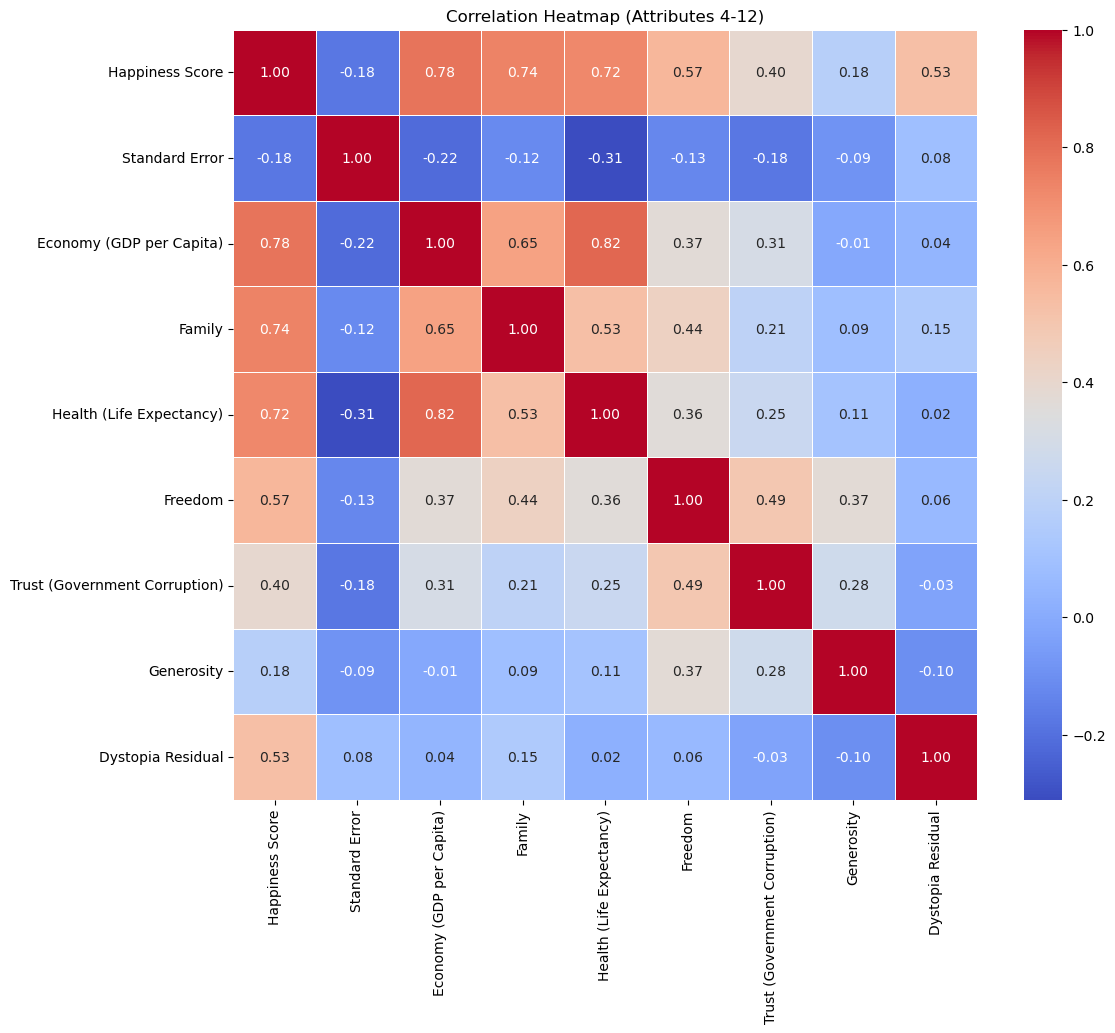

In [7]:
# Select columns 4 to 12
selected_columns = dataset.iloc[:, 3:12]

# Generate a correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Attributes 4-12)')
plt.show()

### Cek Statistika

In [8]:
descriptive_stats = dataset.describe()

print(descriptive_stats)

       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.02

# BAB 3 - Memvalidasi Data

Temuan :

    1. Dalam datast terdapat 3 tipe data, yaitu integer, float, dan object
    2. Jumlah tiap - tiap missing value pada kolom adalah 0 atau tidak ada

Kedepannya harus menentukan objek data dan menentukan tipe data seperti apa yang dibutuhkan untuk membangun model kedepannya

## BAB 4 - Menentukan Objek Data

| Country                       |           |
|-------------------------------|-----------|
| Region                        |           |
| Happiness Rank                |           |
| Happiness Score               | Class     |
| Standard Error                |           |
| Economy (GDP per Capita)      | Attribute |
| Health (life Expectancy)      | Attribute |
| Freedom                       | Attribute |
| Trust (Government Corruption) | Attribute |
| Generosity                    | Attribute |
| Dystopia Residual             | Attribute |

##  Bab 5 - Membersihkan Data

In [9]:
import missingno as ms

In [10]:
dataset.replace("?", np.nan, inplace= True)

In [11]:
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
dataset.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [13]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


Region : ['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


Melihat apakah ada data yang null

In [14]:
dataset.isnull().values.any()

False

In [15]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index([], dtype='object')

### Cek distribusi data yang hilang

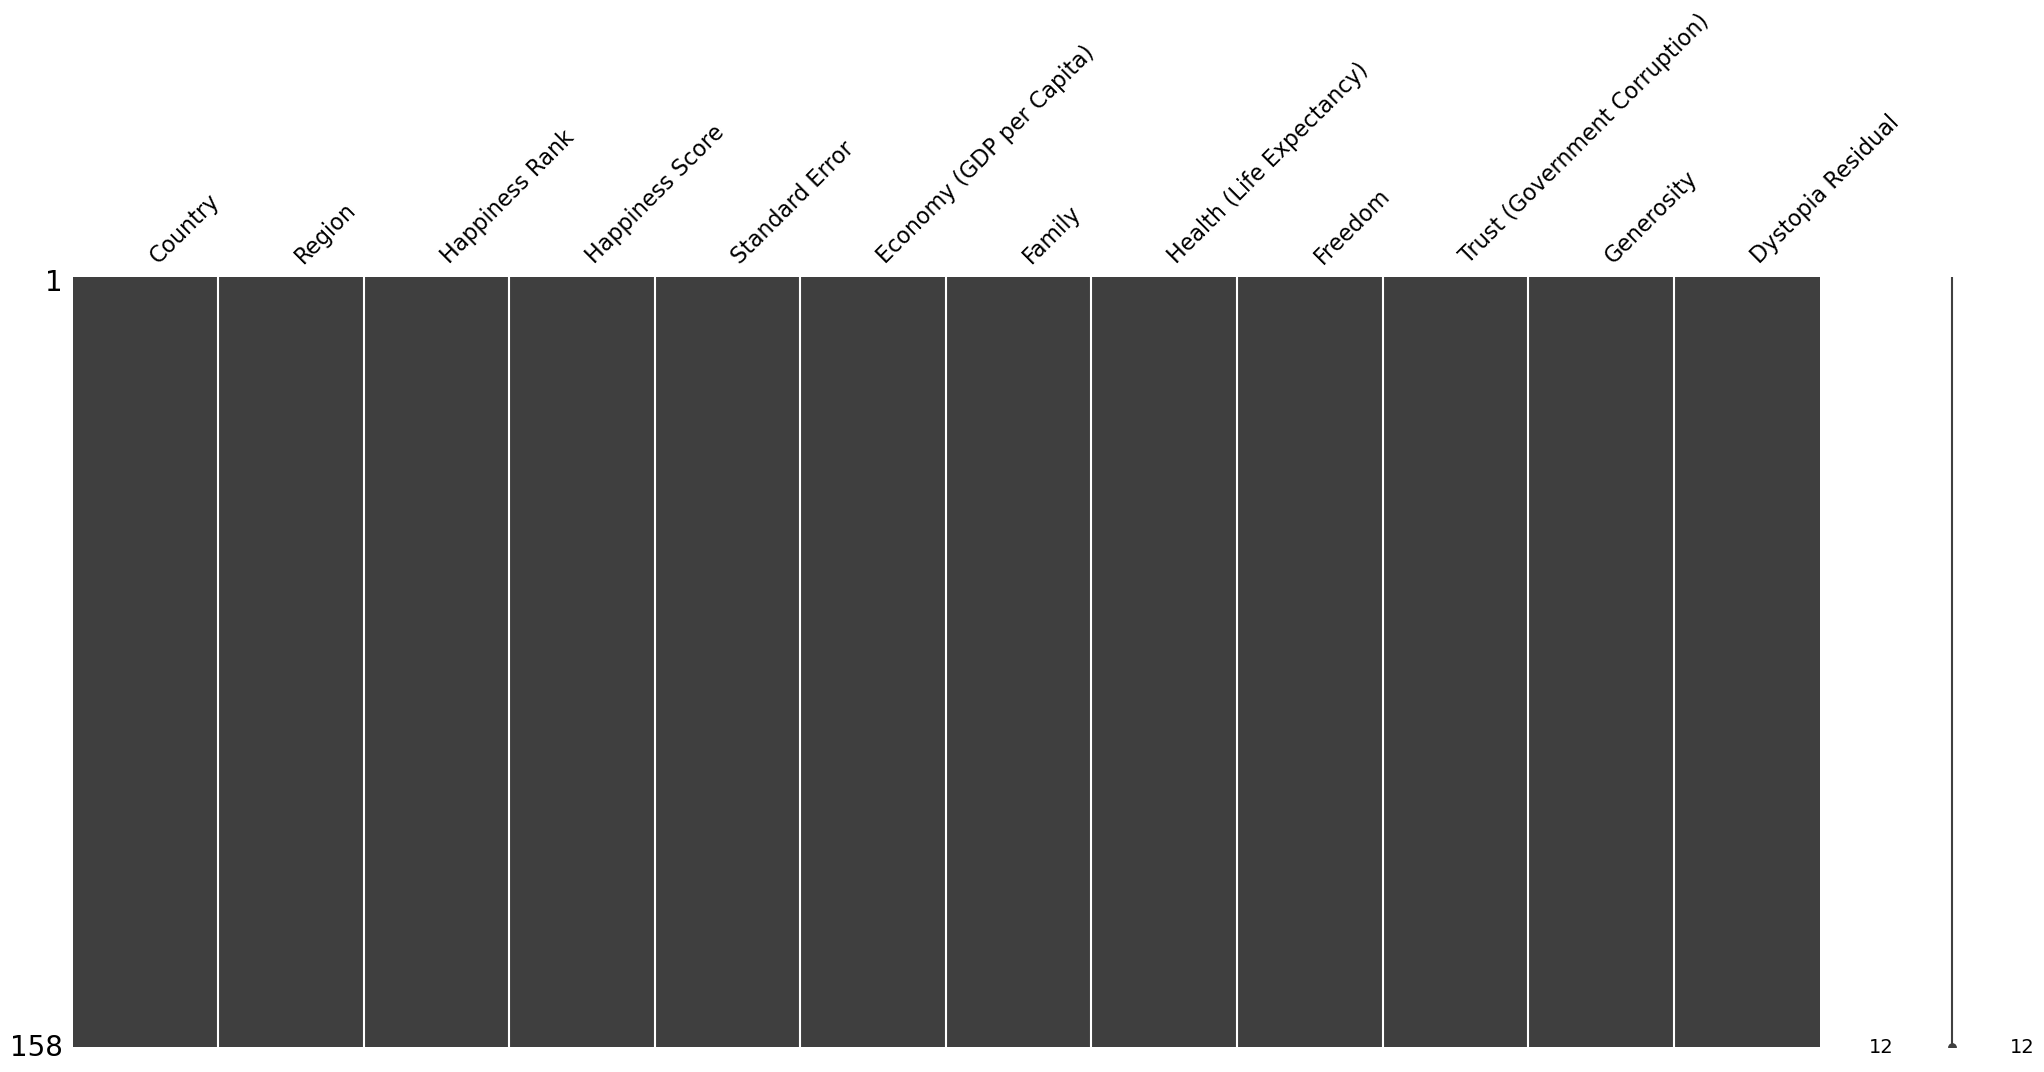

In [16]:
ms.matrix(dataset)

plt.show()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Bab 6 - Mengkonstruksi Data 

Dari info data yang telah ada, ditemukan bahwa dari 12 kolom, terdapat 158 non-null records dan juga 9 float tipe data, 1 integer, dan 2 object.

Pada tujuan yang ingin dicapai, saya membutuhkan kolom 4 - 11 sebagai independent variable dan kolom ke 3 sebagai dependent variable.

Tipe data yang dibutuhkan sudah sesuai yaitu float

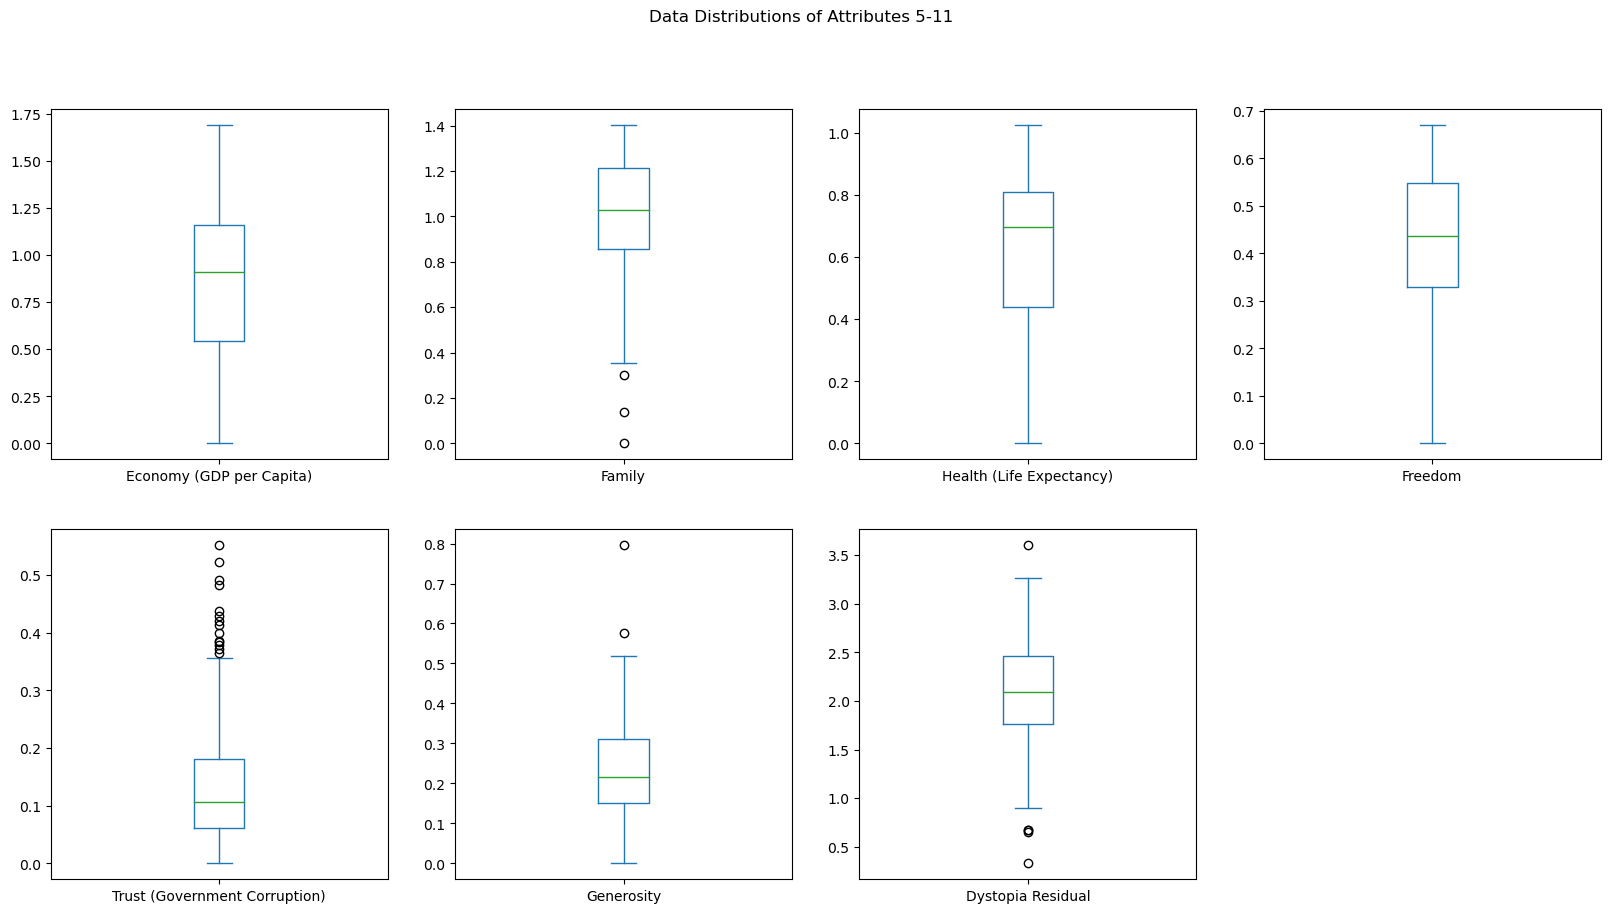

In [18]:
# Assuming you have a DataFrame named 'dataset' and want to create box plots for attributes 5 to 11
attributes_to_plot = dataset.columns[5:12]

# Creating box plots for selected attributes
dataset[attributes_to_plot].plot(kind='box', subplots=True, layout=(2, 4), sharex=False, figsize=(20, 10),
                                 title='Data Distributions of Attributes 5-11')
plt.show()

Temuan : Tidak ada outliers

## Bab 7 - Menentukan Label Data

Dikarenakan tujuannya adalah regresi linear, attribut harus dibagi menjadi independent variabel dan dependent variabel. Disini variabel dependent nya (y) adalah Score Happiness

In [19]:
y = dataset['Happiness Score']

In [20]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

Membuat label baru untuk mengelompokkan tingkat kebahagian

In [21]:
# Define the bins and labels for the customized happiness levels
bins = [0, 3, 6.5, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create a new column 'Happiness Level' based on the 'Happiness Score'
dataset['Happiness Level'] = pd.cut(dataset['Happiness Score'], bins=bins, labels=labels)


In [22]:
dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Level
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Medium
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Medium
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Medium
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low


## Bab 8 - Membangun Model

Algortima yang akan digunakan adalah Regresi Linear. Fungsi regresi linear disini adalah untuk memprediksi score kebahagian (Happiness Score)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
dataset = dataset.drop(columns=['Country', 'Region', 'Happiness Rank', 'Standard Error', 'Happiness Level'])

In [26]:
dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Menentukan kolom mana saja yang dijadikan variabel independen dan variabel dependen

In [29]:
X = dataset[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
             'Generosity', 'Dystopia Residual']]
y = dataset['Happiness Score']

Membagi data menjadi data latih dan data tes

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membangun model regresi

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

Mencari nilai mse dan r2

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 7.313926609479024e-08
R-squared (R2): 0.9999999484481188


In [36]:
print("Koefisien model:")
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')
print(f'Intercept: {model.intercept_}')

Koefisien model:
Economy (GDP per Capita): 1.0001182677311922
Family: 0.9999683155738956
Health (Life Expectancy): 0.9999108990634991
Freedom: 0.9998357429785737
Trust (Government Corruption): 0.9999902711128004
Generosity: 0.9999088001614574
Dystopia Residual: 1.000027789502709
Intercept: 9.670242957504627e-06
